# DATA GATHERING

DATA FROM CSV FILE

In [1]:
import pandas as pd

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.shape

(2356, 17)

DATA FROM TSV: TWEET IMAGE PREDICTIONS

In [3]:
import requests
import os
folder = 'image_predict'
if not os.path.exists(folder):
    os.makedirs(folder)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
os.listdir(folder)

['image-predictions.tsv']

In [6]:
df_img = pd.read_csv('image-predictions.tsv' , sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


DATA FROM TWITTER API

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

###Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
####Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

###  I could not create developers account in twitter.

In [8]:
import json
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
tweets[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w

In [9]:
import csv
f = csv.writer(open("twitter_api.csv", "w"))

# Write CSV Header
f.writerow(["tweet_id", "retweet_count", "favorite_count"])

for x in tweets:
    f.writerow([x["id"],
                x["retweet_count"],
                x["favorite_count"]])
    
    
#code for this was from https://stackoverflow.com/questions/1871524/how-can-i-convert-json-to-csv
    

In [10]:
df_api = pd.read_csv("twitter_api.csv")
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


So we finally have three dataframes:
From twitter as df_twitter, 
For images as df_img, 
From Twitter API as df_api, 

# ASSESING DATA

### ASSESSING DF_TWITTER:  

In [11]:
df_twitter.shape

(2356, 17)

In [12]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter.sample(50)        

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
444,819238181065359361,NaN,NaN,2017-01-11 17:42:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,None,None,pupper,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,None,None,None,None
693,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphé. He patrols the lake. Looking f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942...,11,10,Ralphé,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
403,824297048279236611,NaN,NaN,2017-01-25 16:45:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She got in trouble. One h*ck of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824297048...,11,10,Nala,None,None,None,None
1352,703774238772166656,NaN,NaN,2016-02-28 02:50:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/703774238...,10,10,None,None,None,None,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,None,None,None,None


In [14]:
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df_twitter.timestamp.dtypes

dtype('O')

In [16]:
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df_twitter.tweet_id.duplicated().sum()

0

QUALITY ISSUES:
•	in_reply_to_status_id count is positive, we need to deal with original tweets only.
•	 When checked through sample, it was found that the stages of dogs were mentioned in text,  but were missing from classification column.
•	As per standard, rating_denominator should be 10, but when checked through rating_denominator.value_counts, few rows have values not equal to 10.
•	Few rows have numerator values very high, like 165/144 etc.
•	There are many missing values.
•   The dtype of time is string, should be changed to timestamp.
•   The name and stage column have few values as None. 
• tweet_id is a integer, should be converted to object (string).

TIDYNESS ISSUES:
• The 4 category of the dogs should be in one column only, not 4 columns. 



### DF_IMG ASSESSMENT 

In [19]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_img.shape

(2075, 12)

In [21]:
df_img.duplicated().sum()

0

In [22]:
df_img.tweet_id.duplicated().sum()

0

In [23]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
df_img.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

Quality issues: 
•The breeds of the dogs should be same case (either upper or all lower) 
•Tweet_id to be converted to string.
•The columns names to be updated for better description



### DF_API ASSESSMENT

In [26]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.214000e+03,2214.000000,2214.000000
mean,7.474716e+17,3331.270551,8513.709124
std,6.789556e+16,5388.482845,11997.716381
min,6.685423e+17,0.000000,0.000000
25%,6.829790e+17,728.250000,1760.250000
50%,7.341939e+17,1616.000000,3897.500000
75%,8.037531e+17,3817.250000,10890.000000
max,8.924206e+17,79515.000000,132810.000000


In [27]:
df_api.tweet_id.duplicated().sum()

0

In [28]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 3 columns):
tweet_id          2214 non-null int64
retweet_count     2214 non-null int64
favorite_count    2214 non-null int64
dtypes: int64(3)
memory usage: 52.0 KB


In [29]:
df_api.shape

(2214, 3)

NO quality issue in this table.
Tidyness issue 2: NEED TO MERGE DF_API WITH DF_TWITTER.

# DATA CLEANING

## DF_TWITTER AND DF_API
##### Since this two tables have to merged together, I will first merge them and then will clean both of them simultaneously.


In [30]:
# first lets make copy of all dataframes.
df_tc = df_twitter.copy()
df_ac = df_api.copy()
df_ic = df_img.copy()

#### QUALITY ISSUE 1 :  When checked through sample, it was found that the stages of dogs were mentioned in text,  but were missing from classification column.

In [31]:
df_tc.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None


In [32]:
df_tc[df_tc.doggo == 'doggo'].count()
# here it can be seen that numbr of doggo in doggo column is 97.

tweet_id                      97
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     97
source                        97
text                          97
retweeted_status_id           10
retweeted_status_user_id      10
retweeted_status_timestamp    10
expanded_urls                 94
rating_numerator              97
rating_denominator            97
name                          97
doggo                         97
floofer                       97
pupper                        97
puppo                         97
dtype: int64

In [33]:
df_tc[df_tc.pupper == 'pupper'].count()
# here it can be seen that numbr of doggo in pupper column is 247.

tweet_id                      257
in_reply_to_status_id           4
in_reply_to_user_id             4
timestamp                     257
source                        257
text                          257
retweeted_status_id            23
retweeted_status_user_id       23
retweeted_status_timestamp     23
expanded_urls                 255
rating_numerator              257
rating_denominator            257
name                          257
doggo                         257
floofer                       257
pupper                        257
puppo                         257
dtype: int64

In [34]:
#Lets make a regex pattern for all kind of dog category
#considering spelling mistakes
#doggo = '[Dd][oO][gG][gG]*[oO][Ss]*'
#floofer = '[Ff][Ll][Oo][Oo]*[Ff][Ee][Rr][Ss]*'
#pupper = '[Pp][Uu][Pp][Pp]*[Ee][Rr]'
#puppo = '[Pp][Uu][Pp][Pp]*[Oo]'
df_tc['doggo'] = df_tc.text.str.extract(r'([Dd][oO][gG][gG]*[oO][Ss]*)', expand = True)
df_tc['floofer'] = df_tc.text.str.extract(r'([Ff][Ll][Oo][Oo]*[Ff][Ee][Rr][Ss]*)', expand = True)
df_tc['pupper'] = df_tc.text.str.extract(r'([Pp][Uu][Pp][Pp]*[Ee][Rr]*[Ss]*)', expand = True)
df_tc['puppo'] = df_tc.text.str.extract(r'([Pp][Uu][Pp][Pp]*[Oo]*[Ss]*)', expand = True)

In [35]:
df_tc.doggo.value_counts()
#doggo = ['doggo', 'doggos', 'Doggo', 'DOGGO']

doggo     87
doggos    10
Doggo      9
DOGGO      1
Name: doggo, dtype: int64

In [36]:
df_tc.floofer.value_counts()
#floofer = ['Floofer', 'floofer']


Floofer    6
floofer    4
Name: floofer, dtype: int64

In [37]:
df_tc.pupper.value_counts()
#pupper = ['pupper', 'puppers', 'Pupper', 'PUPPER', 'puppe', 'pupperrr', 'pupperrrs', 'pupperr']

pupper     247
puppers     23
Pupper       8
PUPPER       5
puppe        2
Name: pupper, dtype: int64

In [38]:
df_tc.puppo.value_counts()
#puppo = ['pupp', 'pup', 'pups', 'puppo', 'PUP', 'Pupp', 'Pup', 'PUPP', 'puppos', 'Puppo']

pupp      283
pup       173
pups       54
puppo      33
Pupp        9
PUP         9
Pup         8
PUPP        5
puppos      2
Puppo       1
Name: puppo, dtype: int64

In [39]:
doggo = ['doggo', 'doggos', 'Doggo', 'DOGGO']
floofer = ['Floofer', 'floofer']
pupper = ['pupper','puppers', 'Pupper', 'PUPPER', 'puppe', 'pupperrr', 'pupperrrs', 
          'pupperr']

In [40]:
puppo = ['pupp', 'pup', 'pups', 'puppo', 'PUP', 'Pupp', 'Pup', 
         'PUPP', 'puppos', 'Puppo']

In [41]:
#Now as it can be seen that each category has dfferent pattern of names, lets make 
#all of them similar, replacing with correct spelling.
for k in df_tc.doggo:
    if k in doggo:
        df_tc.doggo = df_tc.doggo.str.replace(k, 'doggo')

In [42]:
for k in df_tc.floofer:
    if k in floofer:
        df_tc.floofer = df_tc.floofer.str.replace(k, 'floofer')

In [43]:
for k in df_tc.pupper:
    if k in pupper:
        df_tc.pupper = df_tc.pupper.str.replace(k, 'pupper')

In [44]:
df_tc.pupper.value_counts()

pupperrr     247
pupperrrs     23
pupper         8
pupperr        7
Name: pupper, dtype: int64

In [45]:
df_tc.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [46]:
#I dont know why but the normal replace method was not working fot puppo,
# please let me know why was a problem there.

In [47]:
df_puppo_index = df_tc.puppo.index[df_tc.puppo.notnull()].tolist()

In [48]:
len(df_puppo_index)

577

In [49]:
df_tc.loc[df_puppo_index, ['puppo']] = "puppo"

In [50]:
df_tc.puppo.value_counts()

puppo    577
Name: puppo, dtype: int64

#### Test 

In [51]:
df_tc[df_tc.doggo == 'doggo'].count()
# here it can be seen that numbr of doggo in doggo column is 107, increased from 97 to 107

tweet_id                      107
in_reply_to_status_id           4
in_reply_to_user_id             4
timestamp                     107
source                        107
text                          107
retweeted_status_id            12
retweeted_status_user_id       12
retweeted_status_timestamp     12
expanded_urls                 104
rating_numerator              107
rating_denominator            107
name                          107
doggo                         107
floofer                         1
pupper                         12
puppo                          21
dtype: int64

In [52]:
df_tc[df_tc.pupper == 'pupper'].count()
# here it can be seen that numbr of pupper column is 287, increased from 245

tweet_id                      8
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     8
source                        8
text                          8
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 8
rating_numerator              8
rating_denominator            8
name                          8
doggo                         2
floofer                       0
pupper                        8
puppo                         8
dtype: int64

#### TIDYNESS ISSUE 1 : Combine 2 dataframes, df_tc and df_ac to form df_api_twitter

In [53]:
#now lets merge df_tc and df_ac, on basis of tweet id.
df_tc.shape, df_ac.shape
# as we can see, total tweets in df_ac is less, so to prevent unnecessary nulls columns,
#we will merger these two on the basis of tweet_id from df_ac.

((2356, 17), (2214, 3))

In [54]:
df_api_twitter = pd.merge(df_ac, df_tc,
                            on=['tweet_id'], how='left')

In [55]:
df_api_twitter.shape
# we see that the number of columns is now 19.

(2214, 19)

In [56]:
df_api_twitter.head(1)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


#### TIDYNESS ISSUE  2: The 4 category of the dogs should be in one column only, not 4 columns


In [57]:
list(df_api_twitter)

['tweet_id',
 'retweet_count',
 'favorite_count',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [58]:
#First, reshape the dataframe, so that the categories of dogs are removed from 4
# columns to one column only. 
df_api_twitter = pd.melt(df_api_twitter, id_vars= ['tweet_id',
 'retweet_count',
 'favorite_count',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name'],var_name='category_type', value_name='dog_category')


In [59]:
df_api_twitter.shape

(8856, 17)

In [60]:
df_api_twitter.dog_category.value_counts()

puppo        566
pupperrr     246
doggo        107
pupperrrs     23
floofer       10
pupper         8
pupperr        7
Name: dog_category, dtype: int64

#### Test

In [61]:

#delete columns like: Source, retweeted_status_id, retweeted_status_user_id, 
#    retweeted_status_timestamp, expanded urls and category_type.

df_api_twitter.drop(['source','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'category_type'],axis = 1, inplace = True )

In [62]:
df_api_twitter.head(1)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_category
0,892420643555336193,8853,39467,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN


In [63]:
df_api_twitter.shape

(8856, 11)

In [64]:
# It can be seen that the number of columns are now decreased, with just one new
# column as dog_category.

#### Quality issue 2: in_reply_to_status_id count is positive, we need to deal with original tweets only, NO RETWEETS

In [65]:
#These are the rows with not null in_reply_to_user_id, or they are retweeted tweets.
# these need to be removed from the data frame.
df_retweeted = df_api_twitter[df_api_twitter.in_reply_to_user_id.notnull()]

# Now lets find the index with retweets
df_retweeted_index = df_api_twitter.index[df_api_twitter.in_reply_to_user_id.notnull()].tolist()

#confirming that both of them match; df_retweeted and df_retweeted_index
df_retweeted.shape, len(df_retweeted_index)


((308, 11), 308)

In [66]:
# lets delete df_retweeted from df_api_twitter
df_api_twitter.drop(df_retweeted_index, inplace = True)

In [67]:
df_api_twitter.shape


(8548, 11)

#### Test

In [68]:
df_retweeted = df_api_twitter[df_api_twitter.in_reply_to_user_id.notnull()]
df_retweeted
# No retweets are there now.

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_category


#### quality issue 3: As per standard, rating_denominator should be 10, but when checked through rating_denominator.value_counts, few rows have values not equal to 10.

In [69]:
df_non_10_denominator = df_api_twitter.index[df_api_twitter.rating_denominator!=10].tolist()


In [70]:
#Now change the values of this index to 10.
df_api_twitter.loc[df_non_10_denominator, ['rating_denominator']] = 10

#### Test

In [71]:
# So now all rating_denominator have value equal to 10.
df_api_twitter.rating_denominator.value_counts()
# Now there are no denominators with values other than 10.

10    8548
Name: rating_denominator, dtype: int64

#### QUALITY ISSUE 4: The dtype of time is string, should be changed to timestamp

In [137]:
df_api_twitter.dtypes

tweet_id                         object
retweet_count                     int64
favorite_count                    int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
text                             object
rating_numerator                float64
rating_denominator                int64
name                             object
dog_category                     object
dtype: object

In [147]:
df_api_twitter['timestamp'] =  pd.to_datetime(df_api_twitter['timestamp'], errors='coerce')


#### Test

In [149]:
df_api_twitter.timestamp.dtypes

dtype('<M8[ns]')

#### QUALITY ISSUE 5 :Rating_numerator changed to float from string.

In [150]:
df_api_twitter['rating_numerator'] =  pd.to_numeric(df_api_twitter['rating_numerator'], errors='coerce')


#### Test

In [152]:
df_api_twitter.rating_numerator.dtypes

dtype('float64')

#### QUALITY ISSUE 6 : tweet_id is a integer, should be converted to object (string)

In [153]:
df_api_twitter['tweet_id'] = df_api_twitter['tweet_id'].apply(str)

#### Test

In [154]:
df_api_twitter.dtypes

tweet_id                         object
retweet_count                     int64
favorite_count                    int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
text                             object
rating_numerator                float64
rating_denominator                int64
name                             object
dog_category                     object
dtype: object

In [76]:
# it can be seen that the tweet_id, rating numerator and timestamp have correct 
# dtypes

#### QUALITY ISSUE 7 :  The name column have few values as None. 

In [77]:
# there are few rows with dog names as 'None' replace them will None (null) .

In [78]:
df_name_none = df_api_twitter.index[df_api_twitter.name == 'None'].tolist()

In [79]:
len(df_name_none)

2436

In [80]:
df_api_twitter.loc[df_name_none, ['name']] = None

In [81]:
#It can be seen that the "None" (string) is replaced by None(NULL)

In [82]:
df_api_twitter.name.isnull().sum()
#confirming that all 2436 value are replaced with None.

2436

#### QUALITY ISSUE 8: Few rows have numerator values very high, like 165/144 etc.


In [83]:
df_api_twitter.rating_numerator.value_counts()

12      2120
11      1752
10      1672
13      1316
9        528
8        336
14       196
7        172
5        124
6        104
3         64
4         52
2         16
1         12
75         8
121        4
15         4
144        4
88         4
80         4
24         4
1776       4
27         4
26         4
50         4
99         4
44         4
60         4
84         4
204        4
420        4
45         4
165        4
0          4
Name: rating_numerator, dtype: int64

In [84]:
#lets doubt on ratings which are >15 and <5 and find their index
df_numerator_index = df_api_twitter.index[(df_api_twitter.rating_numerator>15) | (df_api_twitter.rating_numerator<5)].tolist() 

In [85]:
len(df_numerator_index)

224

In [86]:
#now lets use regex to find numerator values from text in following index
#first make a new dataframe with index as per df_numerator_index and drop them from original dataframe.
df_numerator_corrected = df_api_twitter.loc[df_numerator_index]
df_api_twitter.drop(df_numerator_index, inplace = True)

In [87]:
df_numerator_corrected['rating_numerator'] = df_numerator_corrected.text.str.extract(r'(\d\d*\.*\d*\d*)', expand = True)

In [88]:
df_numerator_corrected.rating_numerator.value_counts().sort_values()

50        4
0         4
80        4
11.26     4
420       4
204       4
88        4
44        4
24        4
9         4
165       4
121       4
60        4
1776      4
45        4
144       4
11.27     4
84        4
9.75      8
1        12
2        20
4        48
3        64
Name: rating_numerator, dtype: int64

In [89]:
df_numerator_corrected.loc[8714].text  

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [90]:
#merge two dataframes i.e df_numerator_corrected + df_api_twitter
df_api_twitter = pd.concat([df_api_twitter, df_numerator_corrected], ignore_index = True)

In [91]:
df_api_twitter.shape
#got the final shape, with numerator values updated and corrected.

(8548, 11)

In [92]:
df_api_twitter['rating_numerator'] =  pd.to_numeric(df_api_twitter['rating_numerator'], errors='coerce')


In [93]:
df_api_twitter.rating_numerator.value_counts()
#few values like 420, 144, 1776 are still confusing, and I will consider them as outliers
#while calculations, or as typo error.

12.00      2120
11.00      1752
10.00      1672
13.00      1316
9.00        532
8.00        336
14.00       196
7.00        172
5.00        124
6.00        104
3.00         64
4.00         48
2.00         20
1.00         12
9.75          8
121.00        4
420.00        4
45.00         4
88.00         4
144.00        4
44.00         4
60.00         4
15.00         4
50.00         4
0.00          4
24.00         4
1776.00       4
204.00        4
84.00         4
80.00         4
165.00        4
11.26         4
11.27         4
Name: rating_numerator, dtype: int64

#### Test

In [94]:
df_numerator_index = df_api_twitter.index[(df_api_twitter.rating_numerator>15) | (df_api_twitter.rating_numerator<5)].tolist() 

In [95]:
len(df_numerator_index)
# It can be seen that intially the number was 224, now it is 204.

204

#### Removing duplicates because of melting data.

In [96]:
df_api_twitter.tweet_id.duplicated().sum()

6411

#### It can be seen that because of melting, the number of rows has increased alot.  Now if I delete duplicated based on tweet id, I am not sure which row will be kept in final dataset (I dont want to loose row which has +ve dog category). So I will make one dataset with all dog categories (df1), the will concat with df_api_twitter followed by removing duplicates.

In [97]:
df_api_twitter.dog_category.value_counts()

puppo        545
pupperrr     242
doggo        103
pupperrrs     22
floofer       10
pupper         8
pupperr        7
Name: dog_category, dtype: int64

In [98]:
df_1 = df_api_twitter[(df_api_twitter.dog_category == 'doggo')|(df_api_twitter.dog_category == 'pupper')|(df_api_twitter.dog_category == 'puppo')|(df_api_twitter.dog_category == 'floofer')]

In [99]:
df_1

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_category
9,890240255349198849,7711,32467,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.00,10,Cassie,doggo
41,884162670584377345,3128,20771,NaN,NaN,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12.00,10,Yogi,doggo
79,876537666061221889,4800,23869,NaN,NaN,2017-06-18 20:30:39,I can say with the pupmost confidence that the...,14.00,10,None,doggo
95,872967104147763200,5669,28031,NaN,NaN,2017-06-09 00:02:31,Here's a very large dog. He has a date later. ...,12.00,10,None,doggo
104,871515927908634625,3628,20730,NaN,NaN,2017-06-04 23:56:03,This is Napolean. He's a Raggedy East Nicaragu...,12.00,10,Napolean,doggo
106,871102520638267392,5764,21461,NaN,NaN,2017-06-03 20:33:19,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,14.00,10,None,doggo
116,869596645499047938,3327,16476,NaN,NaN,2017-05-30 16:49:31,This is Scout. He just graduated. Officially a...,12.00,10,Scout,doggo
165,858843525470990336,3771,16304,NaN,NaN,2017-05-01 00:40:27,I have stumbled puppon a doggo painting party....,13.00,10,None,doggo
179,855851453814013952,19196,47844,NaN,NaN,2017-04-22 18:31:02,Here's a puppo participating in the #ScienceMa...,13.00,10,None,doggo
188,854010172552949760,3433,17169,NaN,NaN,2017-04-17 16:34:26,"At first I thought this was a shy doggo, but i...",11.00,10,None,doggo


In [100]:
print(545+279+103+10)

937


In [101]:
df_api_twitter = pd.concat([df_1,df_api_twitter])

In [102]:
df_api_twitter.drop_duplicates(['tweet_id'], inplace = True)

In [103]:
df_api_twitter.shape

(2137, 11)

In [104]:
#all duplicates are gone.

#### Quality issues: for df_img daraframe
#### QUALITY ISSUE 9: . 
#### •Tweet_id to be converted to string

In [105]:
df_ic = df_img.copy()

In [106]:
df_ic.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [107]:
df_ic.tweet_id.dtypes

dtype('int64')

In [108]:
#fixing data type of tweet_id
df_ic['tweet_id'] = df_ic['tweet_id'].apply(str)

#### Test

In [155]:
df_ic.tweet_id.dtypes
# It can be seen that the dtype is changed.

dtype('O')

#### Quality issue 10: The columns names to be updated for better description.

In [110]:
#Updated column names
df_ic.rename(columns={"p1": "p1_breed", "p1_dog": "p1_correct", "p2": "p2_breed", "p2_dog": "p2_correct", "p3": "p3_breed", "p3_dog": "p3_correct"}, inplace = True)

#### Test

In [111]:
df_ic.head(1)

,tweet_id,jpg_url,img_num,p1_breed,p1_conf,p1_correct,p2_breed,p2_conf,p2_correct,p3_breed,p3_conf,p3_correct
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Quality issue 11: The breeds of the dogs should be same case (either upper or all lower)

In [112]:
#lowering case of breed names.
df_ic.p1_breed = df_ic.p1_breed.str.lower()
df_ic.p2_breed = df_ic.p2_breed.str.lower()
df_ic.p3_breed = df_ic.p3_breed.str.lower()

#### Test

In [113]:
df_ic.head()

,tweet_id,jpg_url,img_num,p1_breed,p1_conf,p1_correct,p2_breed,p2_conf,p2_correct,p3_breed,p3_conf,p3_correct
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Now, cleaning part is over, Now I will do analysis based on the data.

# DATA ANALYSIS AND VISUALIZATION

## DF_API_TWITTER

#### 1: Dog category counts

In [114]:
df_api_twitter.head(1)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,dog_category
9,890240255349198849,7711,32467,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,doggo


In [115]:
df_api_twitter.dog_category.value_counts()

puppo      518
doggo      103
floofer      9
pupper       6
Name: dog_category, dtype: int64

It can be noticed that most of the dogs are in puppo stage, followed by pupper,
doggo and floofer. Now lets check retweet_count and favorite_count for various 
stages of dogs.

#### 2:  Which dog category have highest number of retweets and favorite counts

In [116]:
df_api_twitter.groupby('dog_category')['retweet_count'].agg([sum, max])

,sum,max
dog_category,,
doggo,731392,79515
floofer,37403,18497
pupper,14439,4828
puppo,1538503,48265


In [117]:
df_api_twitter.groupby('dog_category')['favorite_count'].agg([sum, max])

,sum,max
dog_category,,
doggo,1554295,131075
floofer,99580,33345
pupper,44668,14514
puppo,4206162,132810


#### Highest Retweets: DOGGO: 79515, highest total retweets: PUPPO: 1666310
#### Highest and total favorite counts: PUPPO: 132810, total counts: PUPPO 4566145

#### 3: Check which dog category has high average rating numerator

In [118]:
df_api_twitter.dtypes

tweet_id                         object
retweet_count                     int64
favorite_count                    int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
text                             object
rating_numerator                float64
rating_denominator                int64
name                             object
dog_category                     object
dtype: object

In [119]:
#first change numerator type to float64
df_api_twitter['rating_numerator'] = pd.to_numeric(df_api_twitter['rating_numerator'], errors='coerce')

In [120]:
df_api_twitter.dtypes

tweet_id                         object
retweet_count                     int64
favorite_count                    int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
text                             object
rating_numerator                float64
rating_denominator                int64
name                             object
dog_category                     object
dtype: object

In [121]:
avg_rating = df_api_twitter.groupby('dog_category').rating_numerator.mean()
avg_rating

dog_category
doggo      13.611650
floofer    11.888889
pupper     11.878333
puppo      11.641429
Name: rating_numerator, dtype: float64

In [122]:
x = []

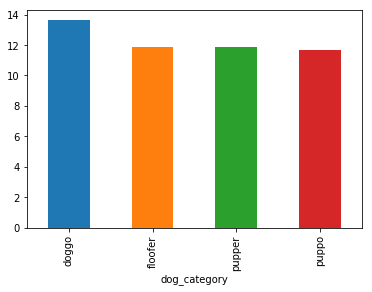

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline
df_api_twitter.groupby('dog_category')['rating_numerator'].mean().plot(kind = 'bar')


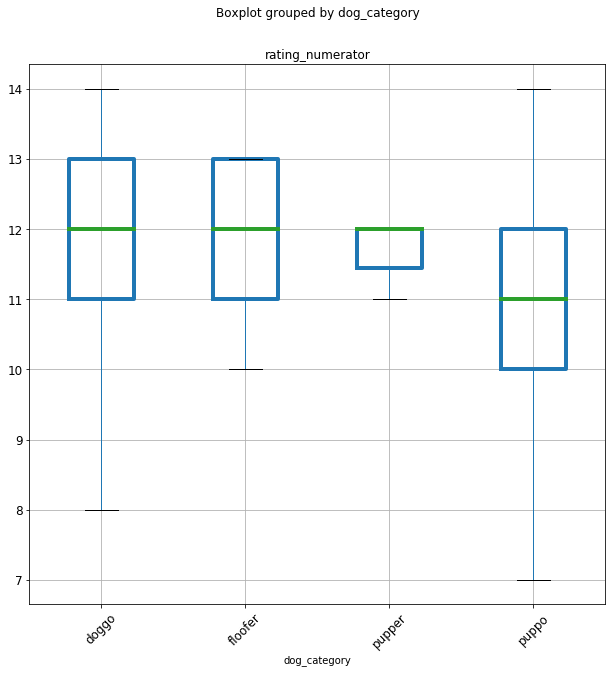

In [124]:
#It can be seen that rating_numerator is highest for doggo, lets make boxplot.
medianprops = dict(linestyle='-', linewidth=4, color='k')
boxprops = dict(linestyle='-', linewidth=4, color='firebrick')
boxplot = df_api_twitter.boxplot(column = ['rating_numerator'], by= 'dog_category', 
                                 rot=45, fontsize=12, figsize = (10,10), showfliers=False,medianprops=medianprops, boxprops=boxprops)


#### The highest rating is high for doggo and floofer, as compared to pupper/puppo. Also, the minimum ratings are very less for pupper/puppo, but least are better for floofer.

#### 4: Checking the average correct prediction for df_ic

In [125]:
df_ic.head()

,tweet_id,jpg_url,img_num,p1_breed,p1_conf,p1_correct,p2_breed,p2_conf,p2_correct,p3_breed,p3_conf,p3_correct
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [126]:
#Lets check top 5 predictions for prediction 1:
df_ic.p1_breed.value_counts()

golden_retriever             150
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
chesapeake_bay_retriever      23
miniature_pinscher            23
seat_belt                     22
staffordshire_bullterrier     20
siberian_husky                20
german_shepherd               20
cardigan                      19
web_site                      19
eskimo_dog                    18
shetland_sheepdog             18
beagle                        18
teddy                         18
maltese_dog                   18
rottweiler                    17
shih-tzu                      17
lakeland_terrier              17
kuvasz                        16
italian_greyhound             16
          

In [127]:
top_10_breeds = df_ic.p1_breed.value_counts().nlargest(10).index.values
top_10_breeds

array(['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua',
       'pug', 'chow', 'samoyed', 'toy_poodle', 'pomeranian',
       'cocker_spaniel'], dtype=object)

In [128]:
top_10_breeds_count = df_ic.p1_breed.value_counts().nlargest(10).values
top_10_breeds_count

array([150, 100,  89,  83,  57,  44,  43,  39,  38,  30])

In [129]:
#Lets make a new array where for a breed and confidence>0.5, total counts which are true
#will be checked.
True_counts = []
for breed in top_10_breeds:
    x = df_ic[(df_ic.p1_breed == breed) & (df_ic.p1_conf>0.5) & (df_ic.p1_correct==True)]['p1_breed'].count()
    True_counts.append(x)
True_counts

[126, 69, 71, 50, 45, 26, 32, 24, 29, 16]

In [130]:
#Lets make a new dataframe for just top 10 predictions.
d = {'breed': top_10_breeds, 'breeds_count': top_10_breeds_count, 'True_counts':True_counts}
df = pd.DataFrame(data=d)
df

,breed,breeds_count,True_counts
0,golden_retriever,150,126
1,labrador_retriever,100,69
2,pembroke,89,71
3,chihuahua,83,50
4,pug,57,45
5,chow,44,26
6,samoyed,43,32
7,toy_poodle,39,24
8,pomeranian,38,29
9,cocker_spaniel,30,16


In [131]:
#lets add one more column as accuracy, which is true count/breed conuts * 100
df['accuracy'] = (df.True_counts/df.breeds_count)*100

In [132]:
df.accuracy.sort_values(ascending = False)

0    84.000000
2    79.775281
4    78.947368
8    76.315789
6    74.418605
1    69.000000
7    61.538462
3    60.240964
5    59.090909
9    53.333333
Name: accuracy, dtype: float64

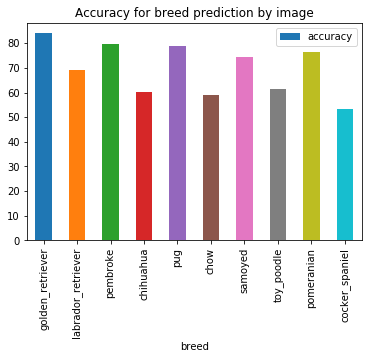

In [133]:
#Now lets make a plot to check accuracy per breed.
df.plot(kind = 'bar', x = 'breed', y = 'accuracy', title = 'Accuracy for breed prediction by image')

In [134]:
# it can be seen that accuracy is highest for golden_retriever followed by
# pembroke

# Storing the final data to master csv

In [135]:
df_api_twitter.to_csv('twitter_archive_master.csv')

In [136]:
df_ic.to_csv('twitter_master_image.csv')